데이터의 원형의 구조를 변형 : 열 방향을 행 방향으로 정렬, 행 방향을 열 방향으로 변경 재정렬
1. 열에서 행으로 피벗 : stack()
2. 행에서 열로 피벗 : unstack()
3. 행과 열을 지정해서 피벗 : pivot(index, columns, values), pivot_table()

In [3]:
# 1. 열에서 행으로 피벗 : stack()
import pandas as pd
df = pd.DataFrame({'A' : ['a','a','a','b','b','b'],
                   'B' : ['ab','ab','ab','bc','bc','bc'],
                   'C' : [1,2,3,4,5,6],
                   'D' : [10,20,30,40,50,60]})
df

s = df.stack()  # 수직으로 겹겹이 쌓인다
s
# stack() 메소드는 다중 인덱스(계층형 인덱스)의 pandas.Series를 리턴한다.
# print(type(s))

<class 'pandas.core.series.Series'>


In [6]:
# 2. 행에서 열로 피벗 : unstack()
print(s.unstack())  # 행 방향으로 정렬됐던 데이터가 열로 정렬된다.

# 기본적으로 멀티 인덱스의 하단계층(가장 안쪽 계층)에 처리된다
# unstack(level) 0이 최상위 계층 즉 바깥쪽 계층
s.unstack(level = 0)

# 전치 행렬  .T
print(df.T)

   A   B  C   D
0  a  ab  1  10
1  a  ab  2  20
2  a  ab  3  30
3  b  bc  4  40
4  b  bc  5  50
5  b  bc  6  60
    0   1   2   3   4   5
A   a   a   a   b   b   b
B  ab  ab  ab  bc  bc  bc
C   1   2   3   4   5   6
D  10  20  30  40  50  60


In [13]:
print(df)
df_r = df.set_index(['A','B'])
print(df_r)
print(df_r.index)
# df_ru = df_r.unstack()
# print(df_ru)   # ValueError: Index contains duplicate entries, cannot reshape

   A   B  C   D
0  a  ab  1  10
1  a  ab  2  20
2  a  ab  3  30
3  b  bc  4  40
4  b  bc  5  50
5  b  bc  6  60
      C   D
A B        
a ab  1  10
  ab  2  20
  ab  3  30
b bc  4  40
  bc  5  50
  bc  6  60
MultiIndex([('a', 'ab'),
            ('a', 'ab'),
            ('a', 'ab'),
            ('b', 'bc'),
            ('b', 'bc'),
            ('b', 'bc')],
           names=['A', 'B'])


In [20]:
# 3. 행과 열을 지정해서 피벗 : pivot(index, columns, values), pivot_table()
df = pd.DataFrame({'A' : ['a','a','a','b','b','b'],
                   'B' : ['x','y','z','x','y','z'],
                   'C' : [1,2,3,4,5,6],
                   'D' : [10,20,30,40,50,60]})
print(df, '\n')
print(df.pivot(index='A', columns='B', values='C'), '\n')

print("C, D values로 지정")
print(df.pivot(index='A', columns='B', values=['C', 'D']), '\n')

# 1) index, columns은 필수로 선언 되어야 한다.
print(df.pivot(index='A', columns='B'), '\n')

# 1)과 동일한 형태로 set_index를 지정할 수 있다.
# set_index()로 다중 인덱스를 지정하고 unstack()으로 처리되어야 한다.
df.set_index(['A','B']).unstack()

   A  B  C   D
0  a  x  1  10
1  a  y  2  20
2  a  z  3  30
3  b  x  4  40
4  b  y  5  50
5  b  z  6  60 

B  x  y  z
A         
a  1  2  3
b  4  5  6 

C, D values로 지정
   C         D        
B  x  y  z   x   y   z
A                     
a  1  2  3  10  20  30
b  4  5  6  40  50  60 

   C         D        
B  x  y  z   x   y   z
A                     
a  1  2  3  10  20  30
b  4  5  6  40  50  60 



C         D        
B  x  y  z   x   y   z
A                     
a  1  2  3  10  20  30
b  4  5  6  40  50  60

In [30]:
# pivot_table(index, columns, aggfunc) : 카테고리별 통계를 계산할 때 사용한다.
# 2) print(df.pivot(index='A', columns='B', values='C'), '\n')
# 3) df.set_index(['A','B']).unstack()

print(df.pivot_table(index = 'A', columns = 'B'),'\n')  # 2), 3)과 동일하다
print(df.pivot_table(index = 'A', columns = 'B', aggfunc = sum),'\n')

   C         D        
B  x  y  z   x   y   z
A                     
a  1  2  3  10  20  30
b  4  5  6  40  50  60 

   C         D        
B  x  y  z   x   y   z
A                     
a  1  2  3  10  20  30
b  4  5  6  40  50  60 



In [40]:
from pandas_datareader import wb
import matplotlib.pyplot as pit

# 1960 ~ 2014간의 한국과 미국의 인구
df = wb.download(country=['KR','US'], indicator='SP.POP.TOTL', start=1960, end=2014)
df

# https://data.worldbank.org/indicator  -> 의 검색창에 population을 입력하면 SP.POP.TOTL로 하위디렉토리로 이동 
# SP.POP.TOTL이 indicator가 된다.
# ex) co2의 배출량을 알고 싶다. co2입력하면 https://data.worldbank.org/indicator/EN.ATM.CO2E.KT로 요청되고 
#     EN.ATM.CO2E.KT가 indicator가 된다

SP.POP.TOTL
country       year             
Korea, Rep.   2014     50746659
              2013     50428893
              2012     50199853
              2011     49936638
              2010     49554112
...                         ...
United States 1964    191889000
              1963    189242000
              1962    186538000
              1961    183691000
              1960    180671000

[110 rows x 1 columns]

In [34]:
df02 = df.unstack(level=0)
df02.head()
df02.tail()

SP.POP.TOTL              
country Korea, Rep. United States
year                             
2010       49554112     309321666
2011       49936638     311556874
2012       50199853     313830990
2013       50428893     315993715
2014       50746659     318301008

In [47]:
# 컬럼의 정보를 확인하자
df02.columns

# 컬럼의 이름을 변경해보자
df02.columns = ['Korea', 'US']
print(df02.head())

# 그래프로 그려서 저장
df02.plot(grid=True)
plt.savefig('pandas_datareader_wb.png')
pit.close()

         Korea         US
year                     
1960  25012374  180671000
1961  25765673  183691000
1962  26513030  186538000
1963  27261747  189242000
1964  27984155  191889000


In [62]:
import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [55]:
# 뉴욕 증권 거래소(NYSE) = SNE 소니 or IBM를 가져와서 데이터를 필터링 하자
# 1) 키를 받아 저장한 후 읽어온다
with open('alphavantage api key.txt') as f:
    api_key = f.read()
    
# 2) 2015. 1. 1 ~ 2019. 12. 31까지의  NYSE의 소니 또는 IBM 주가 정보를 얻어오자
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2019, 12, 31)

# av_daily : open(시가)	high(고가)	low(저가)	close(종가)	volume(거래량)

df_sne = web.DataReader('SNE', 'av-daily', start, end, api_key = api_key)
df_sne

df_ibm = web.DataReader('IBM', 'av-daily', start, end, api_key = api_key)
df_ibm

# 두 개의 데이터를 조합해보자
df_hap = pd.DataFrame({'SNE' : df_sne['close'], 'IBM' : df_ibm['close']})
df_hap

# 세 개의 데이터를 각각 저장해보자
df_sne.to_csv('sne_2015_2019.csv')
df_ibm.to_csv('ibm_2015_2019.csv')
df_hap.to_csv('hap_2015_2019.csv')

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
                 SNE       IBM
2015-01-02  1.000000  1.000000
2015-01-05  0.985409  0.984265
2015-01-06  0.984922  0.963038
2015-01-07  1.047179  0.956744
2015-01-08  1.048638  0.977539
...              ...       ...
2015-12-24  1.201362  0.853079
2015-12-28  1.199903  0.849130
2015-12-29  1.207685  0.862520
2015-12-30  1.202335  0.859805
2015-12-31  1.196984  0.849192

[252 rows x 2 columns]


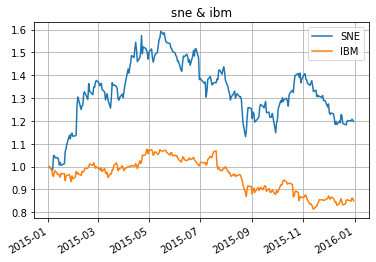

In [67]:
# 시계열 데이터를 만들어서 년도 달 행을 지정하거나 슬라이스 기간을 추출해보자
print(type(df_hap.index))
df_hap.index = pd.to_datetime(df_hap.index)  # 문자열을 가져다가 날짜 데이터로 변환.  df_hap.set_index('date', inplace = True)
print(df_hap)

# 그래프를 그려보자
# df_hap.plot(title=" sne & ibm ", grid = True)
# plt.show()
# plt.savefig('df_hap.png')
# plt.close()

# 기간의 첫날로 규격화하자
df_hap['SNE'] /= df_hap['SNE'][0]
df_hap['IBM'] /= df_hap['IBM'][0]

df_hap.plot(title=" sne & ibm ", grid = True)
plt.show()